In [1]:
!pip install scrapy


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Question 1

!scrapy shell "https://stackoverflow.com/questions"

response.css('h3.s-post-summary--content-title a.s-link::text').extract() #extrating questions



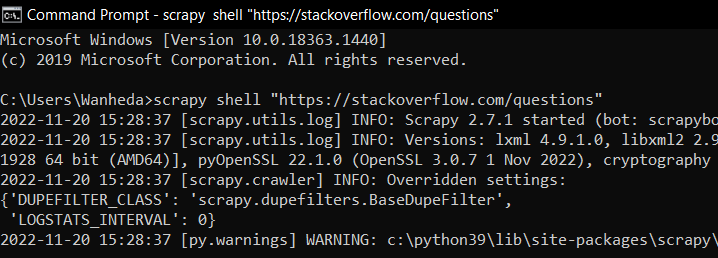

In [2]:
from IPython.display import Image
Image(filename='p1.png') 

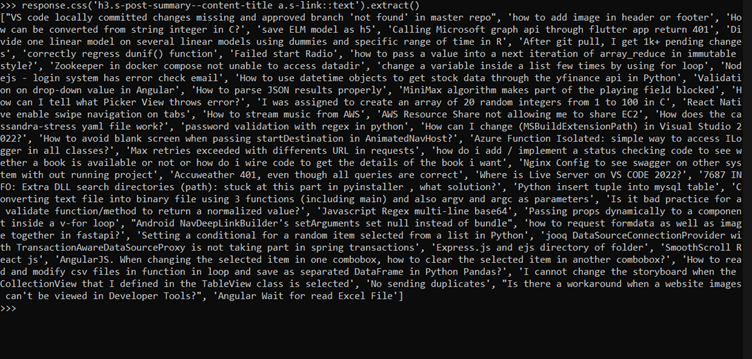

In [3]:
Image(filename='p2.png') 

### Question 2

response.css('h3.s-post-summary--content-title a.s-link::attr(href)').extract() #getting hyperlink of each question


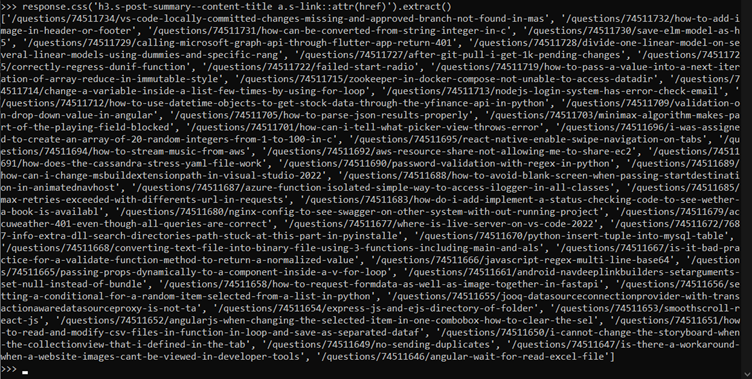

In [4]:
Image(filename='p3.png') 

### Question 3

scrapy shell "https://stackoverflow.com/jobs/companies"

response.css('div.fl1 div.company-list div div.d-flex div:nth-of-type(2) div.fs-body1 div:nth-of-type(2)::text').extract()


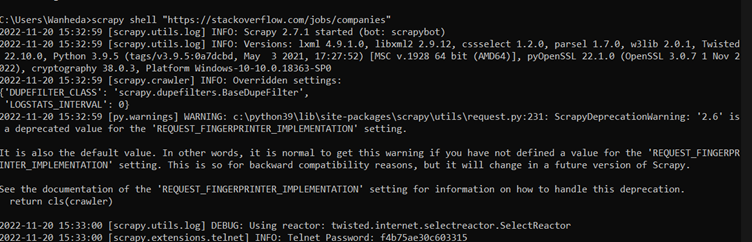

In [5]:
Image(filename='p4.png') 

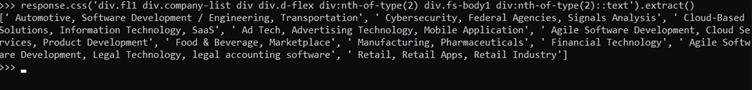

In [6]:
Image(filename='p5.png') 

### Question 4

response.css('div.fl1 div.company-list div div.d-flex div:nth-of-type(n+2) div.fs-body1 div:nth-of-type(1)::text').extract()

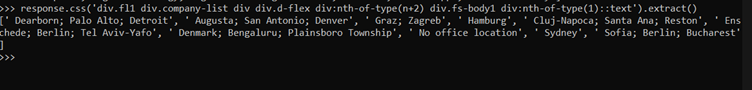

In [7]:
Image(filename='p6.png') 

### Question 5

In [8]:
import scrapy

class JobItem(scrapy.Item):
    title = scrapy.Field()
    company = scrapy.Field()
    location = scrapy.Field()

class myspd(scrapy.Spider):
    name = 'q5'
    start_urls = ['https://stackoverflow.com/jobs/companies']

    def parse(self, response):
       d = response.css('div.fl1 div.company-list div div.d-flex div:nth-of-type(2)')
       for u in d:
          b = JobItem()
          b['title']= u.css('h2 a::text').extract()[0]
          b['location']= u.css('div.fs-body1 div:nth-of-type(1)::text').extract()[0]
          b['company'] = u.css('div.fs-body1 div:nth-of-type(2)::text').extract()[0]
          
          yield b

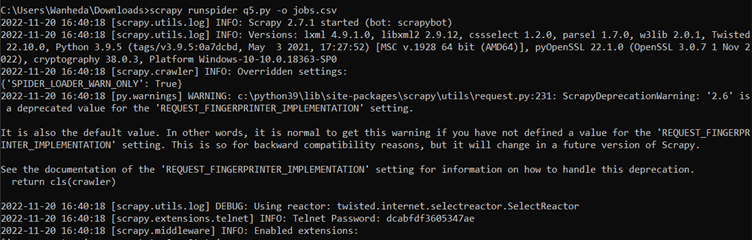

In [9]:
Image(filename='p7.png') 

### Question 6

In [10]:
import scrapy
class JobItem(scrapy.Item):
    title = scrapy.Field()
    company = scrapy.Field()
    location = scrapy.Field()
    
class links():
  def __init__(self):
    pass
  
  def pturl(self):
    applinks = ['https://stackoverflow.com/jobs/companies']
    
    for k in range(2,16):
        applinks.append('https://stackoverflow.com/jobs/companies?pg='+ str(k))
    return applinks

class myspd(scrapy.Spider):
    
    def parse(self, response):
       d = response.css('div.fl1 div.company-list div div.d-flex div:nth-of-type(2) ')
       for u in d:
          b = JobItem()
          b['title']= u.css('h2 a::text').extract()[0]
          b['location']= u.css('div.fs-body1 div:nth-of-type(1)::text').extract()[0]
          b['company'] = u.css('div.fs-body1 div:nth-of-type(2)::text').extract()[0]
          
          yield b
    name = 'joblistings'
    start_urls = links().pturl()
    #print(start_urls) 

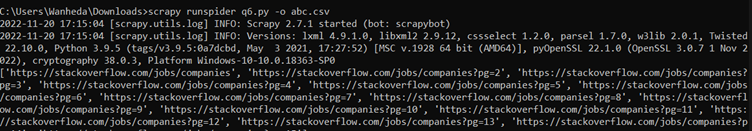

In [11]:
Image(filename='p8.png') 